# Praxis - Loss Functions

In diesem Notebook werden verschiedene Loss Functions anhand des MNIST Datensatzes verglichen

In [0]:
%tensorflow_version 2.x # Command für Google Colab für Tensorflow 2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Command für Google Colab für Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Laden des MNIST Datensatzes

Wie aus der Vorwoche bekannt

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras \
  .datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### Hier werden die MNIST Daten normalisiert, dass diese nur noch als Float von 0 bis 1 gespeichert werden

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Definition der Modelle 

Die Modelle können über die Funktion get_model() erzeugt werden und bestehn aus 2 Dense Layers mit Relu und Sigmoid Funktion

In [0]:
def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

model_mse = get_model() # Modell mit Mean Squared Error Loss
model_cce =  get_model() # Modell mit Categorical Crossentropy
model_scce = get_model() # Modell mit Sparse Categorical Crossentropy

## Kompilieren der Modelle

Für jedes der Modelle wird Stochastic Gradient Descent als Optimizer verwendet und die jeweils zum Modell passende Loss Funktion

Dies wird in der `model.compile()` Funktion festgelegt

In [0]:
optimizer = 'sgd'

model_mse.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_cce.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_scce.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Trainiern der Modelle

Dabei werden die Trainigsergebnisse in der history List gespeichert. 

Für das Training mit der Sparse Categorical Crossentropy müssen die Daten nicht geändert weden. Deswegen kann hier schon mit `model.fit()` trainiert werden. Dabei wird gleich ein Validierungsdatensatz festgelegt.

Die anderen beiden Modell werden der models List hinzugefügt, um diese Trainieren zu können. 

In [0]:
epochs=15 # Festlegung von 15 Trainigsepochen
history = [model_scce.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=True)
]
models = [model_mse, model_cce]

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.8422 - accuracy: 0.7997 - val_loss: 0.3740 - val_accuracy: 0.9018
Epoch 2/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3540 - accuracy: 0.9020 - val_loss: 0.3033 - val_accuracy: 0.9161
Epoch 3/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3019 - accuracy: 0.9147 - val_loss: 0.2689 - val_accuracy: 0.9235
Epoch 4/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2725 - accuracy: 0.9233 - val_loss: 0.2495 - val_accuracy: 0.9300
Epoch 5/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2513 - accuracy: 0.9287 - val_loss: 0.2290 - val_accuracy: 0.9346
Epoch 6/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2338 - accuracy: 0.9338 - val_loss: 0.2187 - val_accuracy: 0.9366
Epoch 7/15
60000/60000 [==============================]

### Umwandlung der Labels in Categorical Labels 
(mehr dazu am Ende des Notebooks) 

Diese werden für das Training mit den anderen Loss Functions benötigt



In [0]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

In [0]:
# Trainieren der anderen beiden Modelle
history += [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0998 - accuracy: 0.3932 - val_loss: 0.0796 - val_accuracy: 0.5636
Epoch 2/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0729 - accuracy: 0.6006 - val_loss: 0.0654 - val_accuracy: 0.6545
Epoch 3/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0608 - accuracy: 0.6780 - val_loss: 0.0552 - val_accuracy: 0.7118
Epoch 4/15
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0526 - accuracy: 0.7393 - val_loss: 0.0484 - val_accuracy: 0.7775
Epoch 5/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0467 - accuracy: 0.7936 - val_loss: 0.0433 - val_accuracy: 0.8209
Epoch 6/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0423 - accuracy: 0.8205 - val_loss: 0.0394 - val_accuracy: 0.8396
Epoch 7/15
60000/60000 [==============================] 

## Plotten der Ergebnisse mit Matplotlib

Über `plt.plot` werden die einzelnen Ergebnisse der Modelle in verschiedenen Farben eingebunden.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

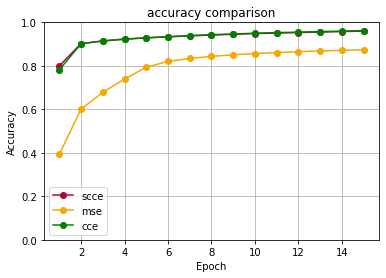

In [0]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))
    plt.ylim((0,1))
    plt.grid()
    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="scce"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="mse")
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="cce"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()

- scce = Sparse Categorical Crossentropy
- cce = Categorical Crossentropy
- mse = Mean Squared Error

# Wann sollte man CategoricalCross Entropy nutzen und wann Sparse Categorical Crossentropy?

für `Categorical Cross Entropy` müssen die Labels als Array mit einer 1 am Index der zugehören Klasse vorliegen.


für `Sparse Categorical Cross Entropy` müssen die Labels mit Bezeichnung der Ausgangsklasse vorliegen.




In [0]:
_test_labels = keras.utils.to_categorical(test_labels, 10)

print('Test labels categorical:')
print(_test_labels[:2])
print('Verwendung der categorical_crossentropy gefordert')
print('\n')
print('Test labels non categorical:')
print(test_labels[:2])
print('Verwendung der sparse_categorical_crossentropy gefordert')

Test labels categorical:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Verwendung der categorical_crossentropy gefordert


Test labels non categorical:
[7 2]
Verwendung der sparse_categorical_crossentropy gefordert


Umwandlung in Categorical Werte:

In [0]:
_test_labels = keras.utils.to_categorical(train_labels, 10)